In [1]:
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
X = np.linspace(0, 10, 10)
Y = X + np.random.randn(*X.shape)

In [3]:
for x, y in zip(X,Y):
    print((round(x,1), round(y,1)))

(0.0, 0.1)
(1.1, -1.0)
(2.2, 1.7)
(3.3, 3.3)
(4.4, 6.2)
(5.6, 4.4)
(6.7, 4.9)
(7.8, 8.5)
(8.9, 8.3)
(10.0, 10.6)


In [4]:
model = Sequential()
model.add(Dense(input_dim=1, units=1, activation="linear", use_bias=False))

In [5]:
sgd = optimizers.SGD(lr=0.05)
model.compile(optimizer='sgd', loss='mse')

In [6]:
weights = model.layers[0].get_weights()
weights

[array([[1.2175876]], dtype=float32)]

In [7]:
w = weights[0][0][0]
w

1.2175876

In [8]:
model.fit(X, Y, batch_size=10, epochs=10, verbose=1)

Epoch 1/10
1/1 [==============================] - 0s 253ms/step - loss: 3.3634
Epoch 2/10
1/1 [==============================] - 0s 7ms/step - loss: 1.4907
Epoch 3/10
1/1 [==============================] - 0s 5ms/step - loss: 1.3263
Epoch 4/10
1/1 [==============================] - 0s 5ms/step - loss: 1.3119
Epoch 5/10
1/1 [==============================] - 0s 4ms/step - loss: 1.3106
Epoch 6/10
1/1 [==============================] - 0s 4ms/step - loss: 1.3105
Epoch 7/10
1/1 [==============================] - 0s 6ms/step - loss: 1.3105
Epoch 8/10
1/1 [==============================] - 0s 4ms/step - loss: 1.3105
Epoch 9/10
1/1 [==============================] - 0s 4ms/step - loss: 1.3105
Epoch 10/10
1/1 [==============================] - 0s 4ms/step - loss: 1.3105


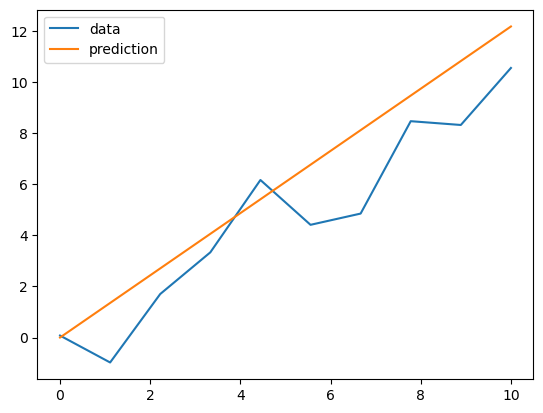

In [9]:
plt.plot(X, Y, label = 'data')
plt.plot(X, w*X, label = 'prediction')
plt.legend()
plt.show()

In [10]:
w = weights[0][0][0]
w

1.2175876

In [11]:
from tensorflow.keras.layers import Activation

In [12]:
model.add(Dense(input_dim = 1, units= 1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer = 'sgd',
              metrics=['binary_accuracy'])

In [13]:
X = np.array([-2, -1.5, -1, 1.25, 1.62, 2])
Y = np.array([0, 0, 0, 1, 1, 1])

In [14]:
model.fit(X, Y, epochs=300, verbose=1)

Epoch 1/300
1/1 [==============================] - 0s 444ms/step - loss: 2.1623 - binary_accuracy: 0.0000e+00
Epoch 2/300
1/1 [==============================] - 0s 5ms/step - loss: 2.1107 - binary_accuracy: 0.0000e+00
Epoch 3/300
1/1 [==============================] - 0s 6ms/step - loss: 2.0610 - binary_accuracy: 0.0000e+00
Epoch 4/300
1/1 [==============================] - 0s 6ms/step - loss: 2.0133 - binary_accuracy: 0.0000e+00
Epoch 5/300
1/1 [==============================] - 0s 8ms/step - loss: 1.9674 - binary_accuracy: 0.0000e+00
Epoch 6/300
1/1 [==============================] - 0s 4ms/step - loss: 1.9233 - binary_accuracy: 0.0000e+00
Epoch 7/300
1/1 [==============================] - 0s 5ms/step - loss: 1.8810 - binary_accuracy: 0.0000e+00
Epoch 8/300
1/1 [==============================] - 0s 5ms/step - loss: 1.8402 - binary_accuracy: 0.0000e+00
Epoch 9/300
1/1 [==============================] - 0s 5ms/step - loss: 1.8010 - binary_accuracy: 0.0000e+00
Epoch 10/300
1/1 [========

In [15]:
model.predict([-2, -1.5, -1, 1.25, 1.62, 2])

1/1 [==============================] - 0s 112ms/step


array([[0.07786015],
       [0.13511132],
       [0.22422355],
       [0.8216466 ],
       [0.87898475],
       [0.9205954 ]], dtype=float32)

In [16]:
model.predict([-1000, 1000])

1/1 [==============================] - 0s 68ms/step


array([[0.],
       [1.]], dtype=float32)

In [17]:
model.layers[0].weights

[<tf.Variable 'dense/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[-0.9448924]], dtype=float32)>]

In [18]:
model.layers[0].get_weights()

[array([[-0.9448924]], dtype=float32)]

# 다중입력 로지스틱회귀

In [19]:
model = Sequential()
model.add(Dense(input_dim = 2, units = 1))
model.add(Activation('sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'sgd', metrics = ['binary_accuracy'])

In [20]:
X = np.array([(0, 0), (0, 1), (1, 0), (1, 1)])

In [21]:
Y = np.array([0, 0, 0, 1])

In [22]:
model.fit(X, Y, epochs=5000, verbose=0)

In [23]:
model.predict(X)

1/1 [==============================] - 0s 43ms/step


array([[0.02838964],
       [0.20836996],
       [0.20386924],
       [0.697594  ]], dtype=float32)

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
 activation_1 (Activation)   (None, 1)                 0         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
model.layers[0].weights

[<tf.Variable 'dense_2/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[2.170646 ],
        [2.1981516]], dtype=float32)>,
 <tf.Variable 'dense_2/bias:0' shape=(1,) dtype=float32, numpy=array([-3.5329306], dtype=float32)>]

In [26]:
model.layers[0].get_weights()

[array([[2.170646 ],
        [2.1981516]], dtype=float32),
 array([-3.5329306], dtype=float32)]

# 십중

In [27]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [28]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [29]:
X_train.shape

(60000, 28, 28)

In [31]:
X_test.shape

(10000, 28, 28)

In [32]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [34]:
for i in range(0, 28, 2):
    for j in range(0, 28, 2):
        print("%3d"% X_train[0][i][j], end=' ')
    print()

  0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0  30  94 170 253 253 225 253 195   0   0 
  0   0   0   0 219 253 253 198 247   0   0   0   0   0 
  0   0   0   0   0   1 253   0   0   0   0   0   0   0 
  0   0   0   0   0   0 190  70   0   0   0   0   0   0 
  0   0   0   0   0   0   0 240 253  25   0   0   0   0 
  0   0   0   0   0   0   0   0  93 253   0   0   0   0 
  0   0   0   0   0   0   0  46 183 253   2   0   0   0 
  0   0   0   0   0  24 221 253 253  78   0   0   0   0 
  0   0   0  18 219 253 253  80   0   0   0   0   0   0 
  0   0 136 253 212 132   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0 


In [36]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [37]:
for i in range(0, 28, 2):
    for j in range(0, 28, 2):
        print("%.2f"% X_train[0][i][j], end=' ')
    print()

0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.12 0.37 0.67 0.99 0.99 0.88 0.99 0.76 0.00 0.00 
0.00 0.00 0.00 0.00 0.86 0.99 0.99 0.78 0.97 0.00 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.00 0.00 0.99 0.00 0.00 0.00 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.00 0.00 0.75 0.27 0.00 0.00 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.94 0.99 0.10 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.36 0.99 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.18 0.72 0.99 0.01 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.00 0.09 0.87 0.99 0.99 0.31 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.07 0.86 0.99 0.99 0.31 0.00 0.00 0.00 0.00 0.00 0.00 
0.00 0.00 0.53 0.99 0.83 0.52 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 


In [38]:
y_train[0]

5

In [39]:
input_dim = 784
X_train=X_train.reshape(60000, input_dim)
X_test=X_test.reshape(10000, input_dim)

In [40]:
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [41]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [42]:
model = Sequential()
model.add(Dense(input_dim= input_dim, units = 10, activation= 'softmax'))

In [43]:
model.compile(optimizer='sgd', loss= 'categorical_crossentropy', metrics='accuracy')
model.fit(X_train, y_train, batch_size=2048, epochs=100, verbose=0)

In [44]:
score = model.evaluate(X_test, y_test)
score

313/313 [==============================] - 1s 2ms/step - loss: 0.4222 - accuracy: 0.8901


[0.42217645049095154, 0.8901000022888184]

# 뉴럴 네트워크

In [46]:
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [47]:
model = Sequential([
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dropout(0, 1),
    Dense(10),
    Activation('softmax')
])

In [48]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

In [49]:
callbacks = [EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True),
             ModelCheckpoint(filepath = 'best_model.h5', monitor='val_accuracy', save_best_only=True)]

In [50]:
model.fit(X_train, y_train, epochs=300, batch_size = 1000, validation_split=0.1, callbacks=callbacks)

Epoch 1/300
54/54 [==============================] - 2s 15ms/step - loss: 0.6600 - accuracy: 0.8265 - val_loss: 0.2158 - val_accuracy: 0.9392
Epoch 2/300
11/54 [=====>........................] - ETA: 0s - loss: 0.2539 - accuracy: 0.9273

C:\Users\bbong\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


54/54 [==============================] - 1s 12ms/step - loss: 0.2288 - accuracy: 0.9334 - val_loss: 0.1563 - val_accuracy: 0.9590
Epoch 3/300
54/54 [==============================] - 1s 12ms/step - loss: 0.1680 - accuracy: 0.9518 - val_loss: 0.1287 - val_accuracy: 0.9645
Epoch 4/300
54/54 [==============================] - 1s 11ms/step - loss: 0.1330 - accuracy: 0.9615 - val_loss: 0.1089 - val_accuracy: 0.9683
Epoch 5/300
54/54 [==============================] - 1s 11ms/step - loss: 0.1071 - accuracy: 0.9685 - val_loss: 0.0996 - val_accuracy: 0.9700
Epoch 6/300
54/54 [==============================] - 1s 11ms/step - loss: 0.0884 - accuracy: 0.9750 - val_loss: 0.0905 - val_accuracy: 0.9732
Epoch 7/300
54/54 [==============================] - 1s 11ms/step - loss: 0.0754 - accuracy: 0.9778 - val_loss: 0.0928 - val_accuracy: 0.9728
Epoch 8/300
54/54 [==============================] - 1s 11ms/step - loss: 0.0629 - accuracy: 0.9819 - val_loss: 0.0807 - val_accuracy: 0.9768
Epoch 9/300
54/54 

In [51]:
results = model.evaluate(X_test, y_test)
print(results)

313/313 [==============================] - 1s 2ms/step - loss: 0.0730 - accuracy: 0.9809
[0.07303179055452347, 0.98089998960495]
